In [37]:
import pickle
paras = pickle.load(open('/data/db/import/save/mouse-export-para-class.pkl', 'rb'))

In [2]:
from scipy.cluster.vq import kmeans
centroids = {}
for b in set(paras['Branch point']):
    centroids[b] = sorted(kmeans(paras[(paras["Branch point"]==b)]["PromPresScore300"], 2)[0])
paras = paras.assign(prom_clust = paras.apply(lambda r: 0 if abs(centroids[r["Branch point"]][0]-r["PromPresScore300"])<abs(centroids[r["Branch point"]][1]-r["PromPresScore300"]) else 1, axis=1))

In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/gencpg/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

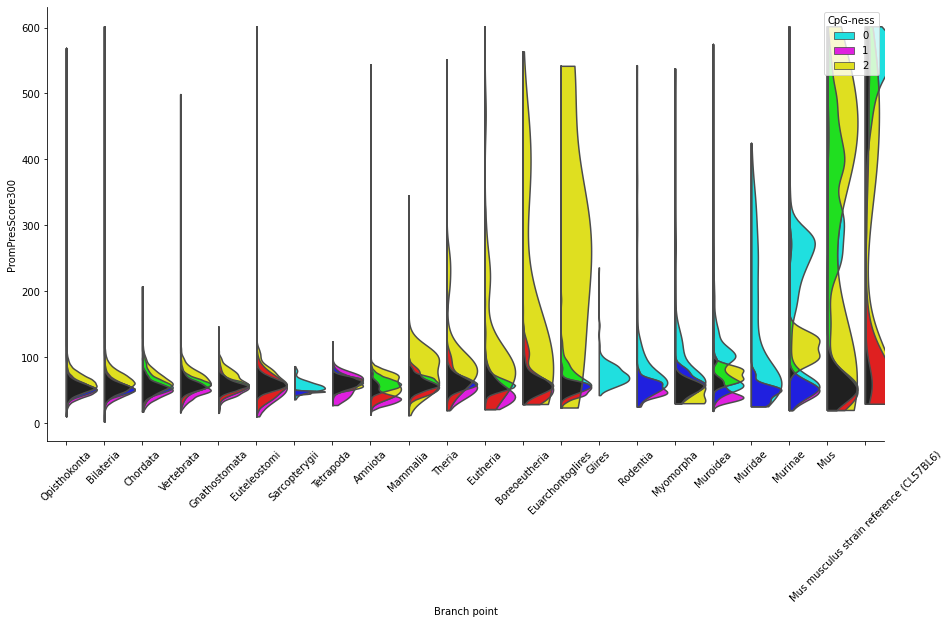

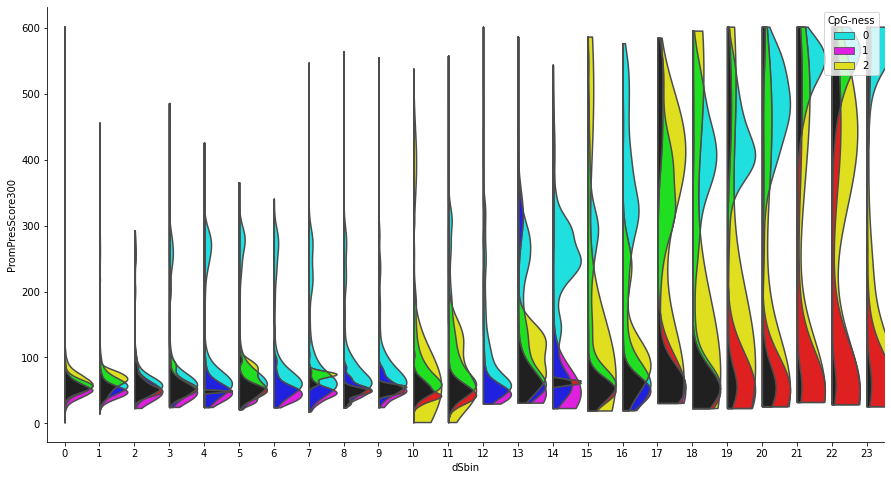

In [3]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras, order=branch_order, inner=None, palette=['cyan', 'magenta', 'yellow'], scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras, inner=None, palette=['cyan', 'magenta', 'yellow'], scale="count")
despine()

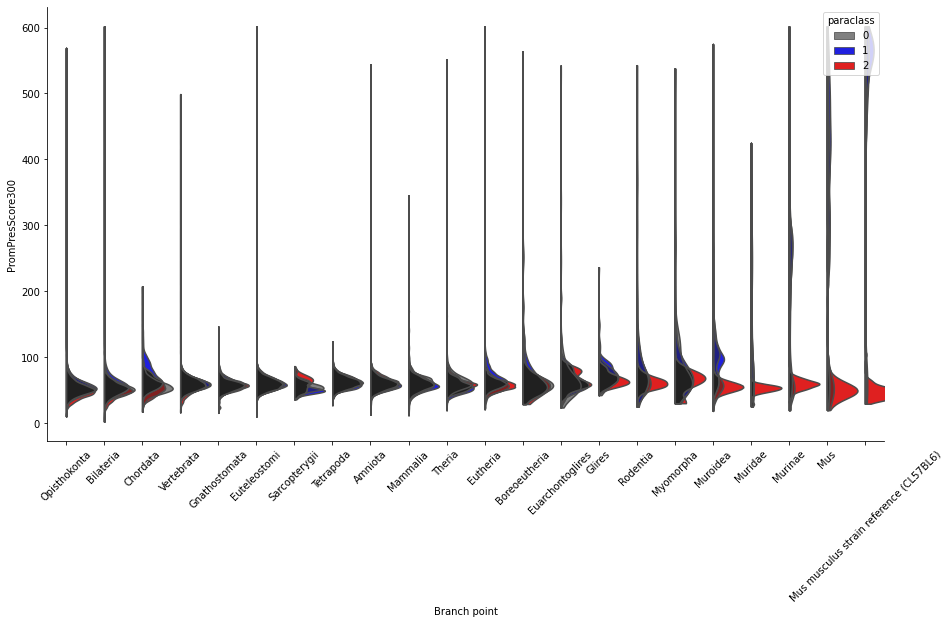

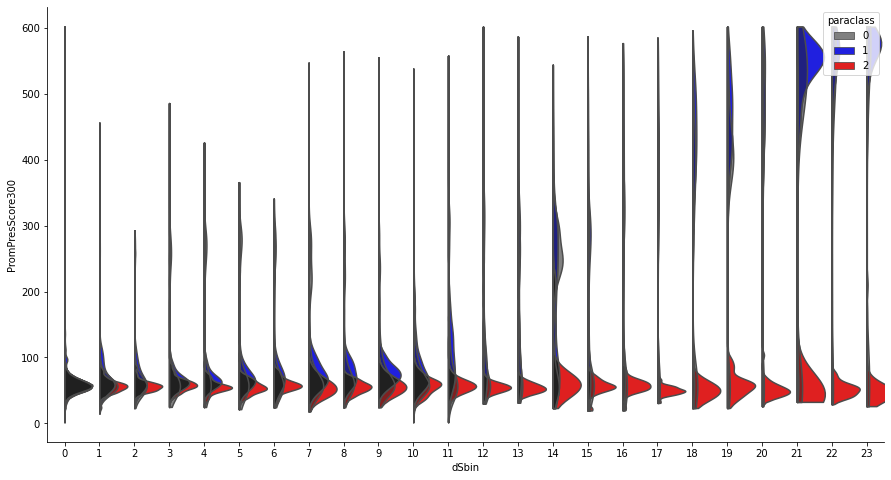

In [38]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="paraclass", cut=0, data=paras, order=branch_order, inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="paraclass", cut=0, data=paras, inner=None, palette=['grey', 'blue', 'red'])
despine()

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

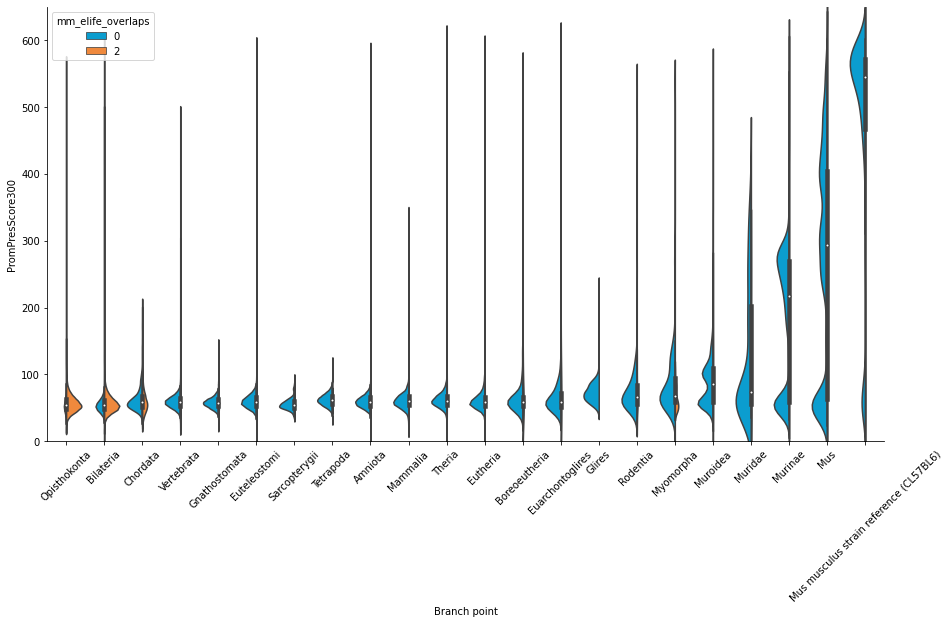

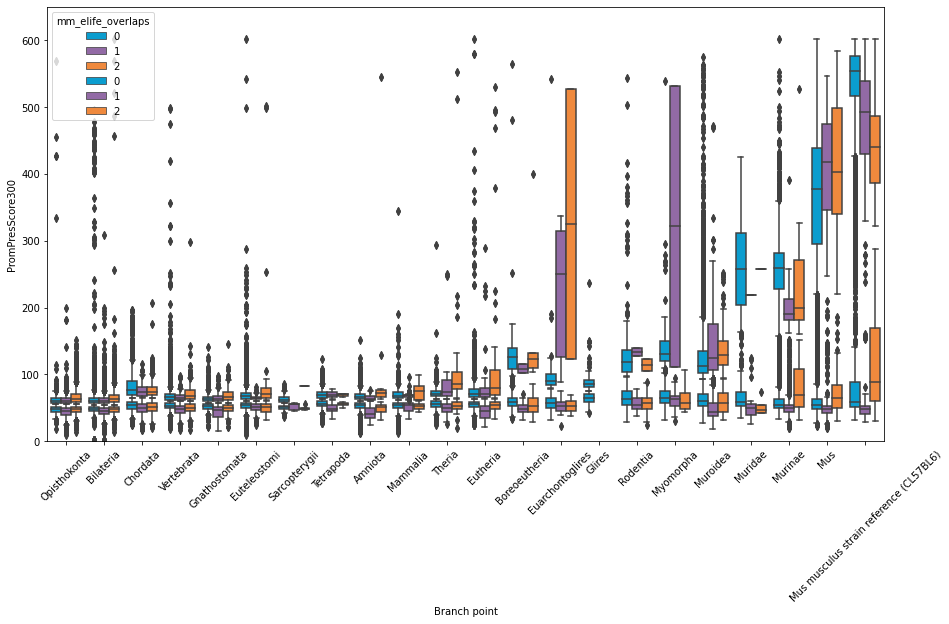

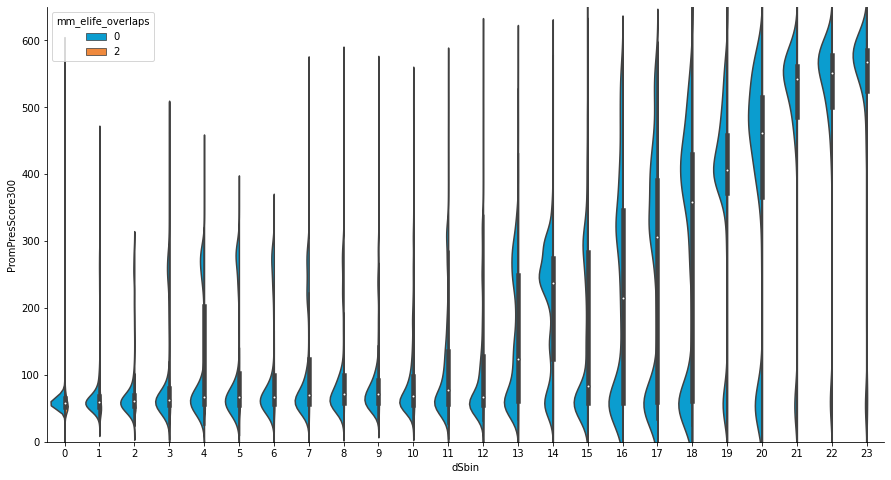

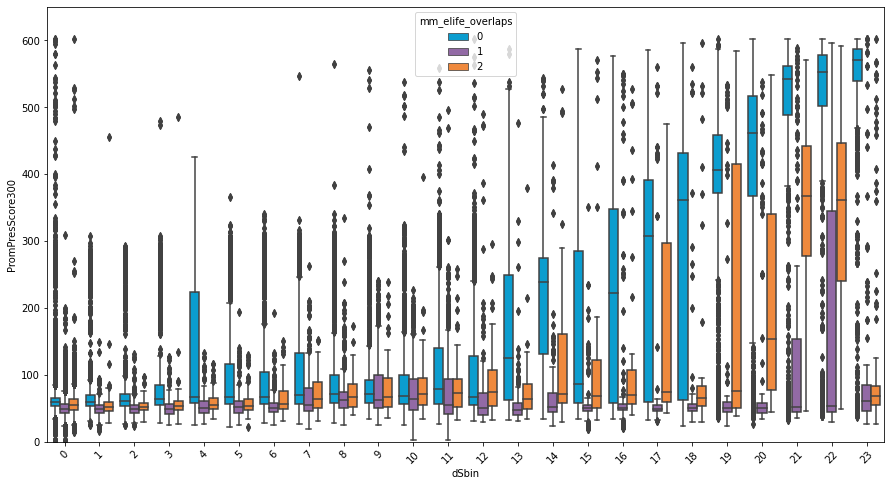

In [4]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[paras["mm_elife_overlaps"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[(paras["prom_clust"]==0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[(paras["prom_clust"]==1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="mm_elife_overlaps", data=paras[paras["mm_elife_overlaps"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="mm_elife_overlaps", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

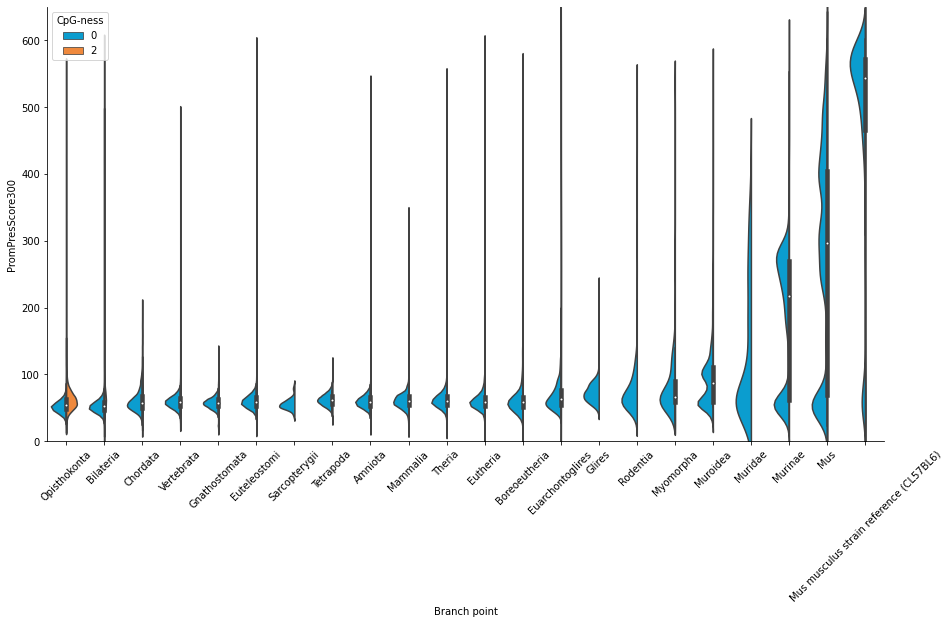

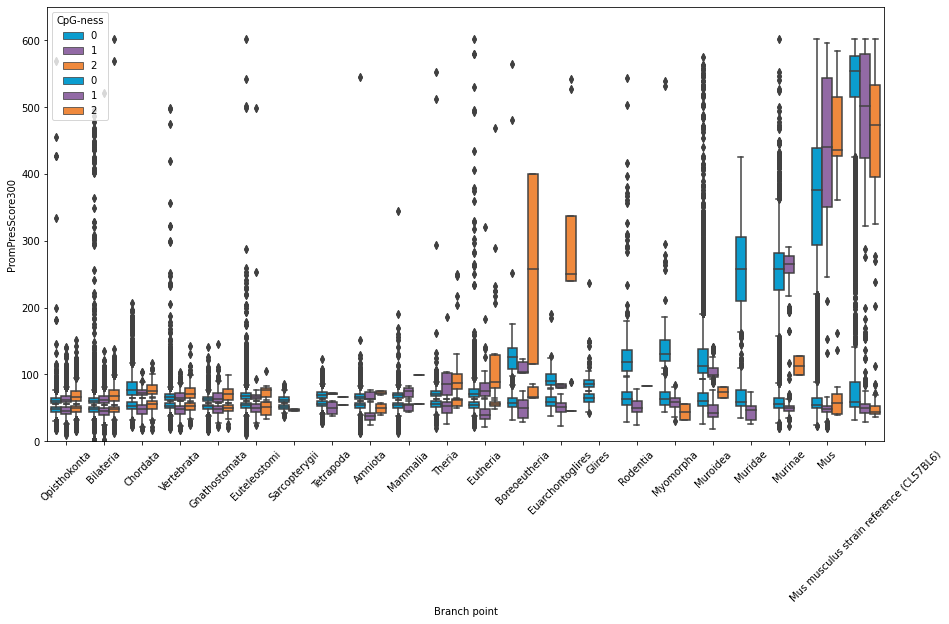

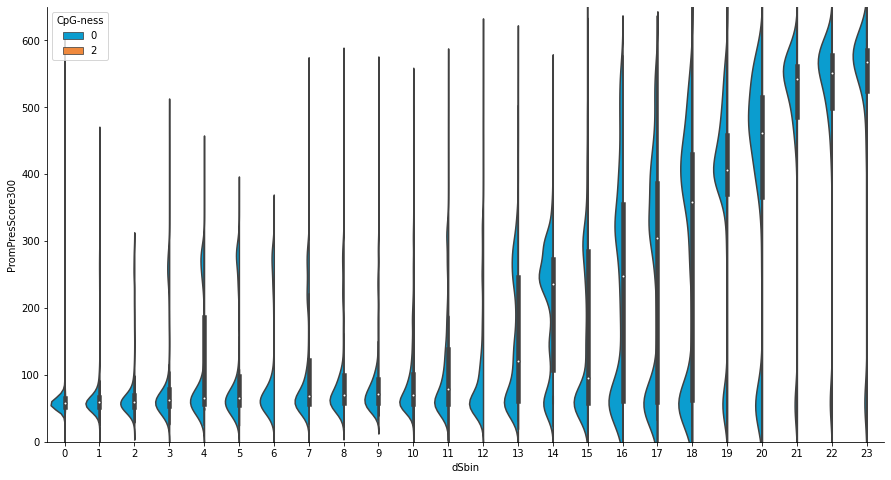

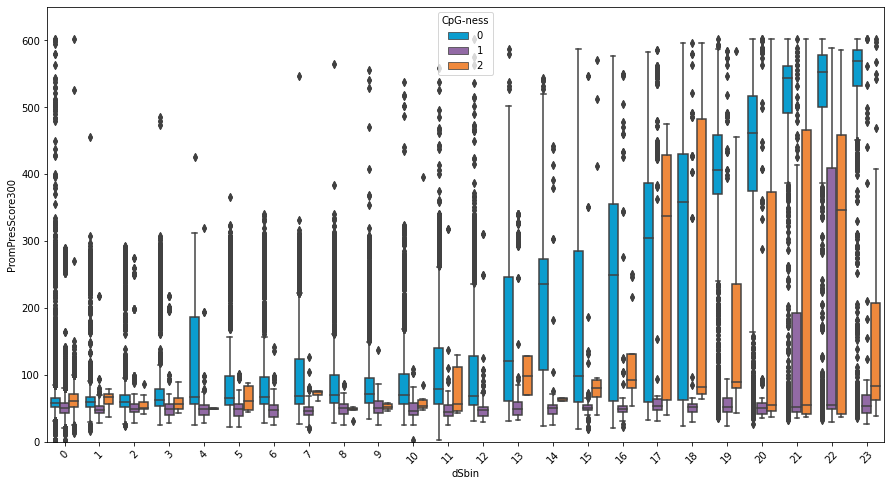

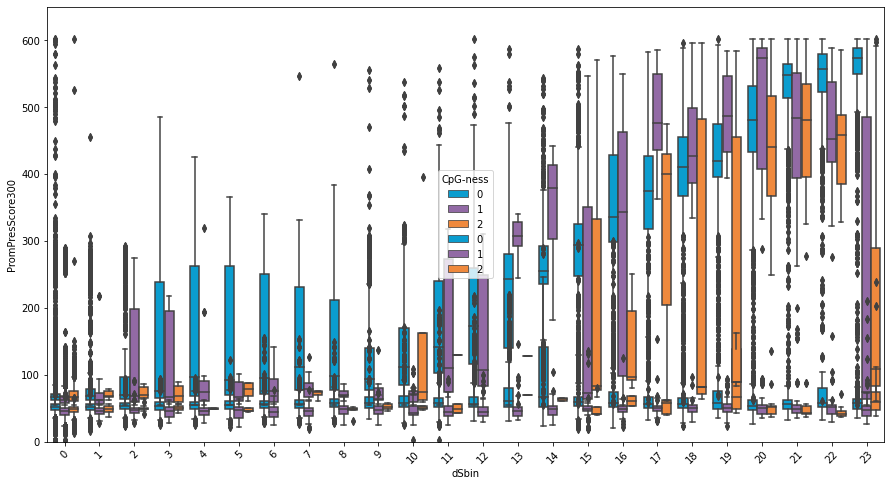

In [5]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Glires", "Rodentia", "Myomorpha", "Muroidea", "Muridae", "Murinae", "Mus", "Mus musculus strain reference (CL57BL6)"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[paras["CpG-ness"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"]==0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"]==1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[paras["CpG-ness"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True, scale="count")
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
smf.ols(formula="PromPresScore300 ~ dSbin + mm_elife_overlaps", data=paras, subset=(paras["prom_clust"] == 1)).fit().summary()
#paras[(paras["prom_clust"] == 1)]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PromPresScore300   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 9.399e+05
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:            -1.6881e+06
No. Observations:              317146   AIC:                         3.376e+06
Df Residuals:                  317143   BIC:                         3.376e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            67.0021      0.111    603.561      0.000      66.785      67.220
dSbin                18.6894      0.014   1338.240      0.000      18.662      18.717
mm_elife_overlaps    -3.8933      0.123    -31.543      0.000      -4.135      -3.651
==============================================================================
Omnibus:                    86145.933   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1553669.340
Skew:                          -0.847   Prob(JB):                         0.00
Kurtosis:                      13.710   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are leaving only the top (well-preserved promoter sequence) cluster of paralogs. The bottom cluster of paralogs does not have promoter sequence preserved above base-level (that is what you'd get for matching a random pair of promoter sequences)

In it, we model the preservation score as a linear regression of dS and CGI-ness:
`Score ~ dS + CGI-ness`

we then get a positive coefficient for `-dSbin` (that is, negative coefficient for dS) and a negative coefficient for CGI-ness, which goes to show that within that cluster the CGI-full genes have less promoter sequence preservation than the CGI-less genes.

The regression being used is the least squares linear regression.

<AxesSubplot:xlabel='Branch point', ylabel='PromPresTssMinus300'>

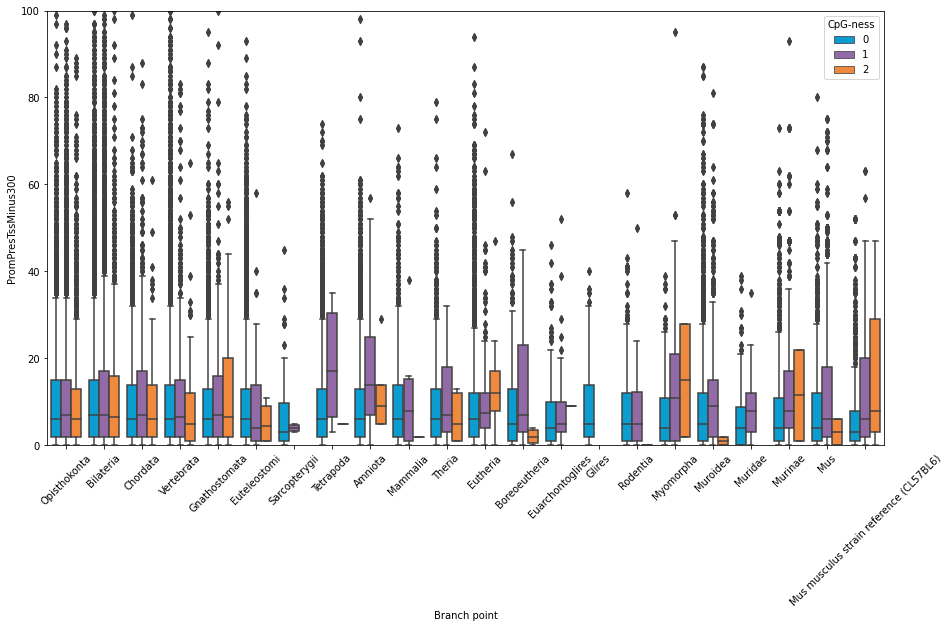

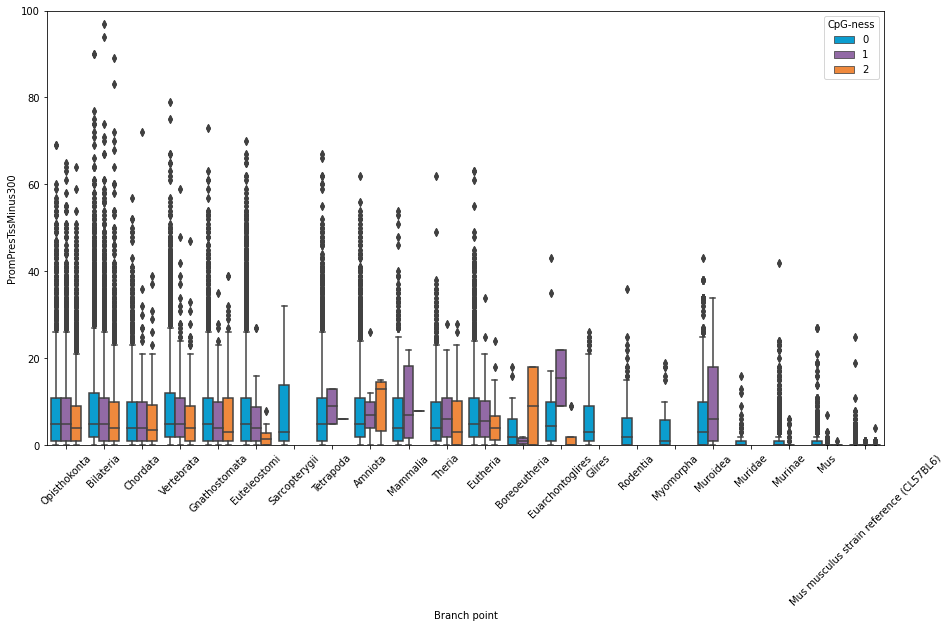

In [203]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresShift300'>

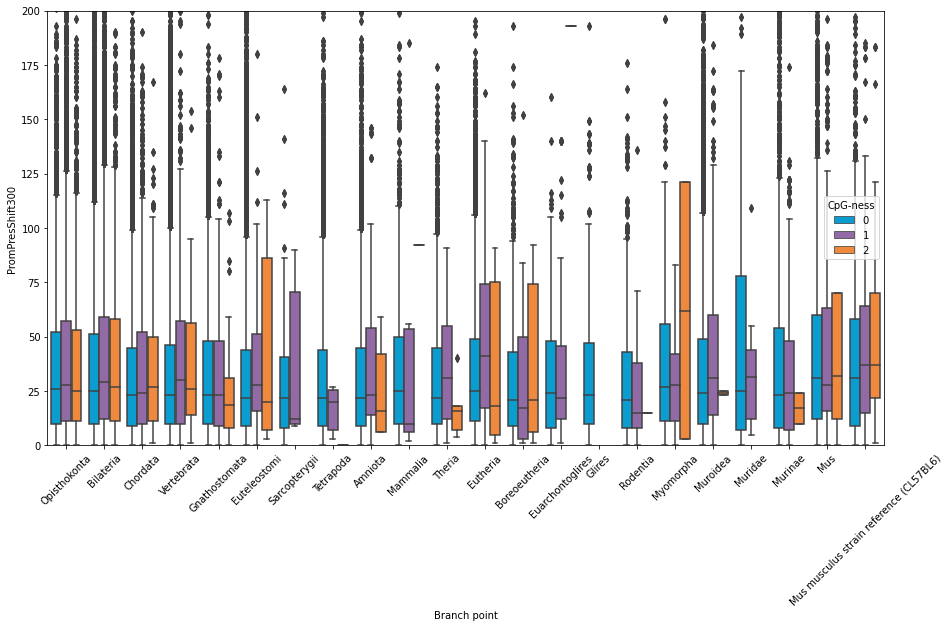

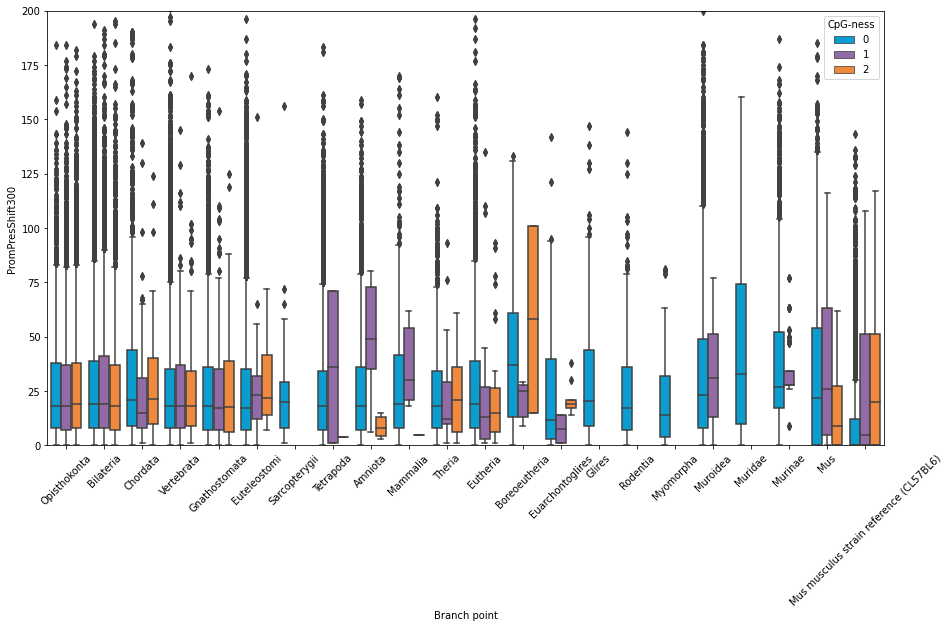

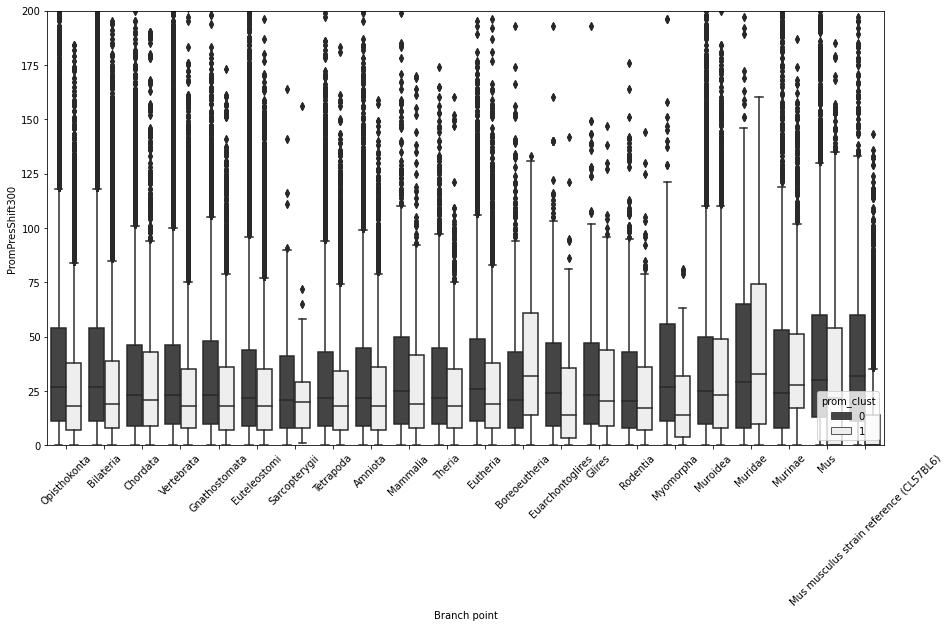

In [204]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="prom_clust", data=paras, order=branch_order, palette=['#444444', '#eeeeee'], saturation=1.0)


In [35]:
import pickle
paras = pickle.load(open('/data/db/import/save/human-export-para-class.pkl', 'rb'))

In [23]:
from scipy.cluster.vq import kmeans
centroids = {}
for b in set(paras['Branch point']):
    centroids[b] = sorted(kmeans(paras[(paras["Branch point"]==b)]["PromPresScore300"], 2)[0])
paras = paras.assign(prom_clust = paras.apply(lambda r: 0 if abs(centroids[r["Branch point"]][0]-r["PromPresScore300"])<abs(centroids[r["Branch point"]][1]-r["PromPresScore300"]) else 1, axis=1))

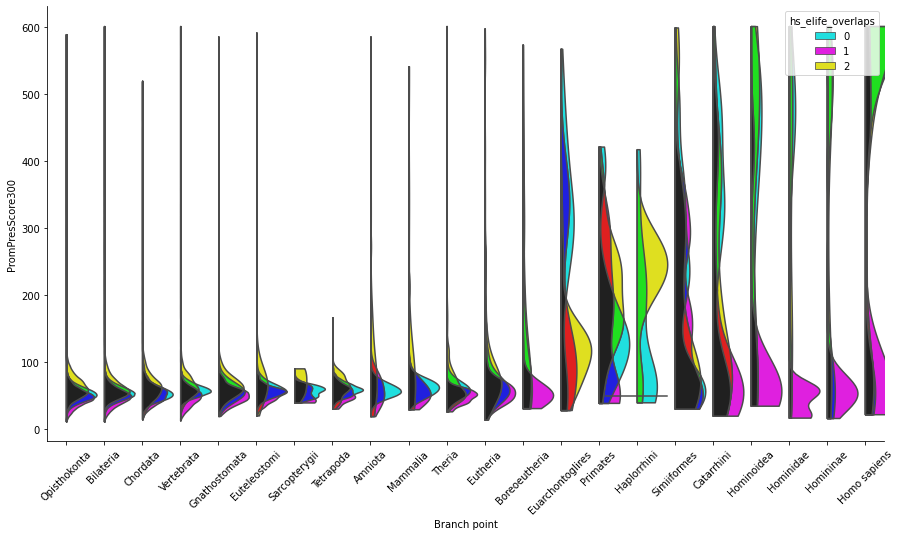

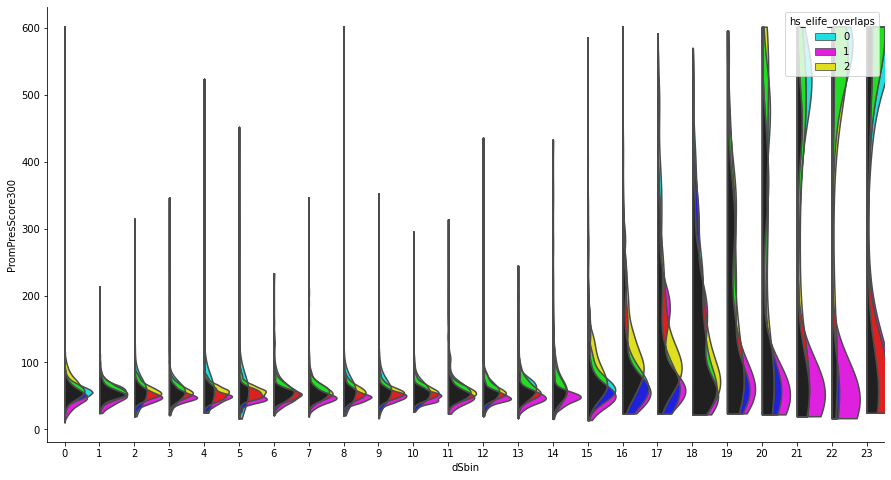

In [24]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras, order=branch_order, inner=None, palette=['cyan', 'magenta', 'yellow'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras, inner=None, palette=['cyan', 'magenta', 'yellow'])
despine()

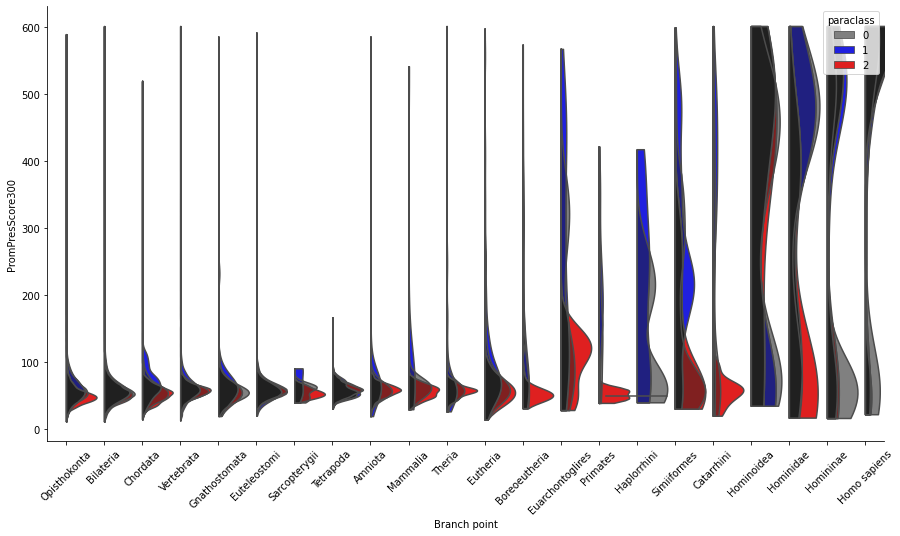

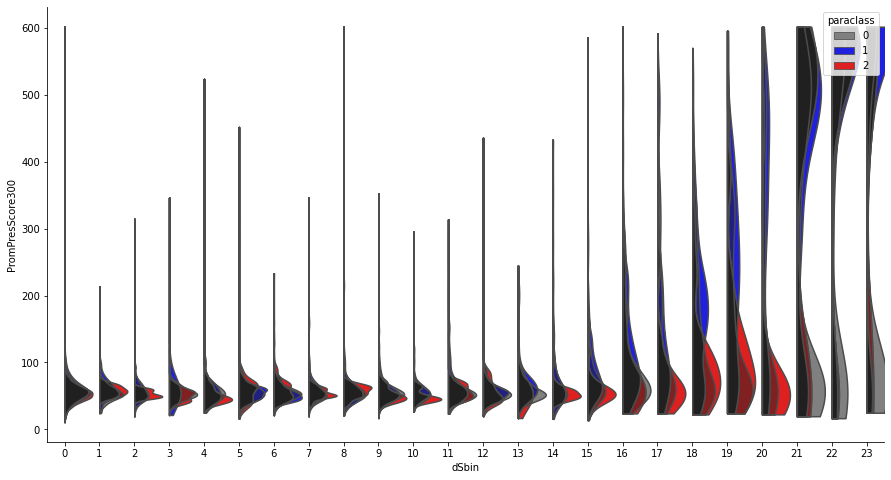

In [36]:
from matplotlib import pyplot
from plots import onesidedviolinplot
from seaborn import despine

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
onesidedviolinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="paraclass", cut=0, data=paras, order=branch_order, inner=None, palette=['grey', 'blue', 'red'])
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
onesidedviolinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="paraclass", cut=0, data=paras, inner=None, palette=['grey', 'blue', 'red'])
despine()

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

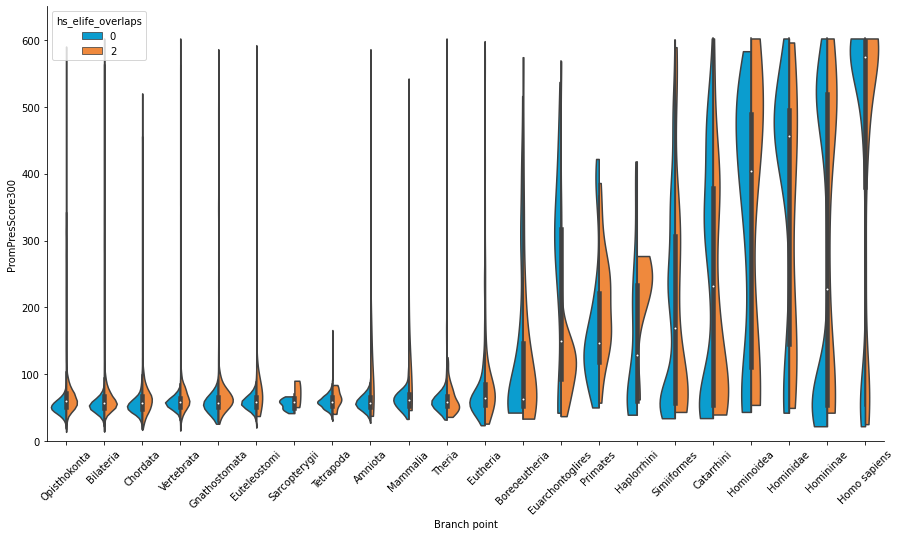

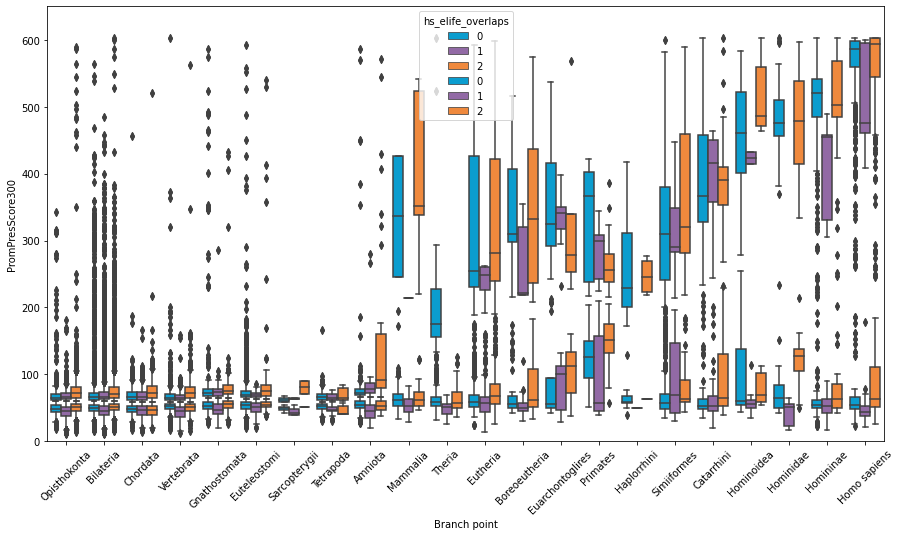

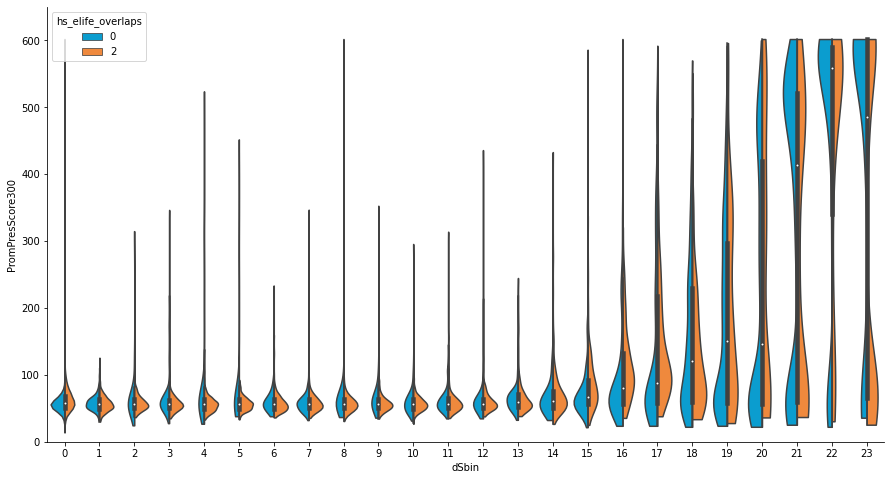

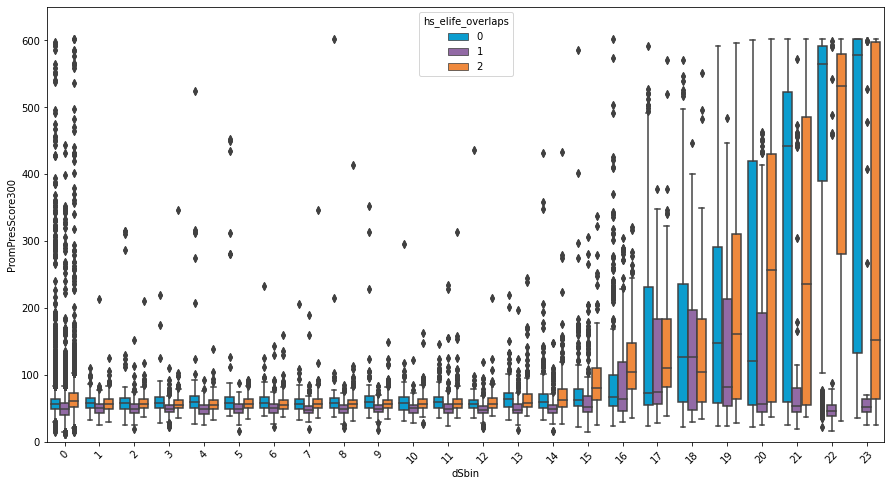

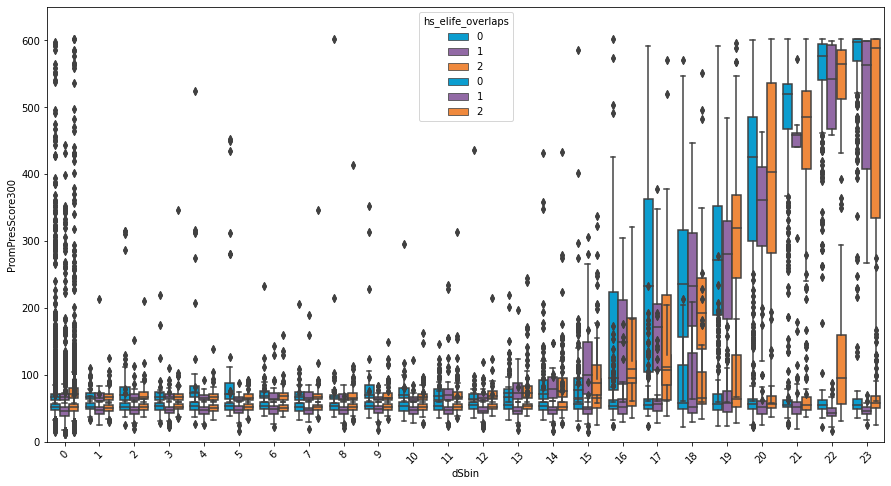

In [25]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras[paras["hs_elife_overlaps"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", cut=0, data=paras[paras["hs_elife_overlaps"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 0)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="hs_elife_overlaps", data=paras[(paras["prom_clust"] == 1)], saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
smf.ols(formula="PromPresScore300 ~ dSbin + hs_elife_overlaps", data=paras, subset=(paras["prom_clust"] == 1)).fit().summary()
#smf.ols(formula="PromPresScore300 ~ dSbin + hs_elife_overlaps", data=paras).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PromPresScore300   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                 7.351e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        14:22:34   Log-Likelihood:            -5.2659e+05
No. Observations:               96986   AIC:                         1.053e+06
Df Residuals:                   96983   BIC:                         1.053e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            72.2710      0.337    214.494      0.000      71.611      72.931
dSbin                13.0130      0.035    375.073      0.000      12.945      13.081
hs_elife_overlaps    -2.5151      0.208    -12.096      0.000      -2.923      -2.108
==============================================================================
Omnibus:                    25629.233   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           699104.329
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                      16.082   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='dSbin', ylabel='PromPresScore300'>

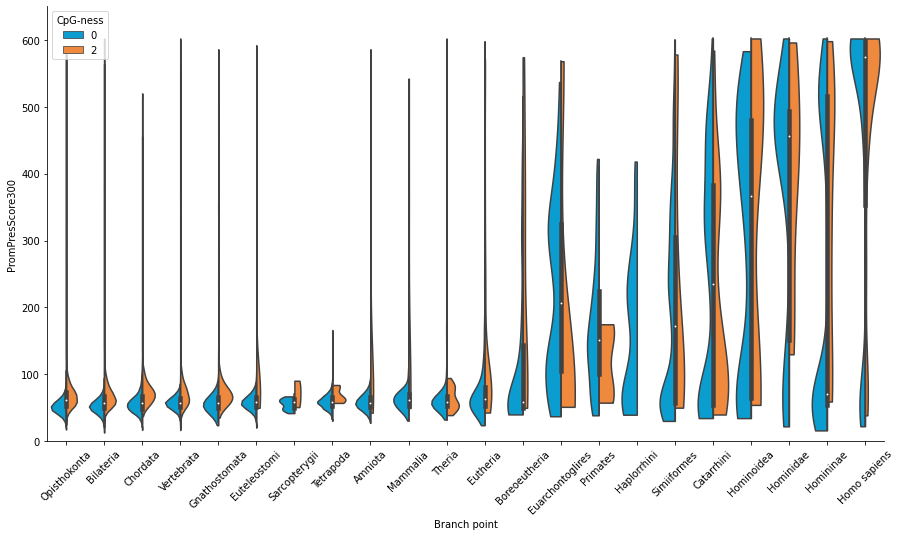

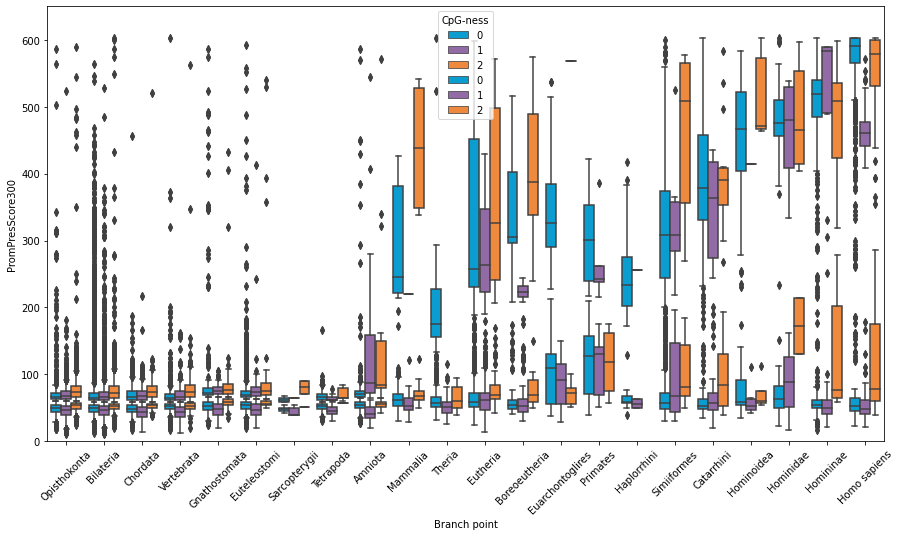

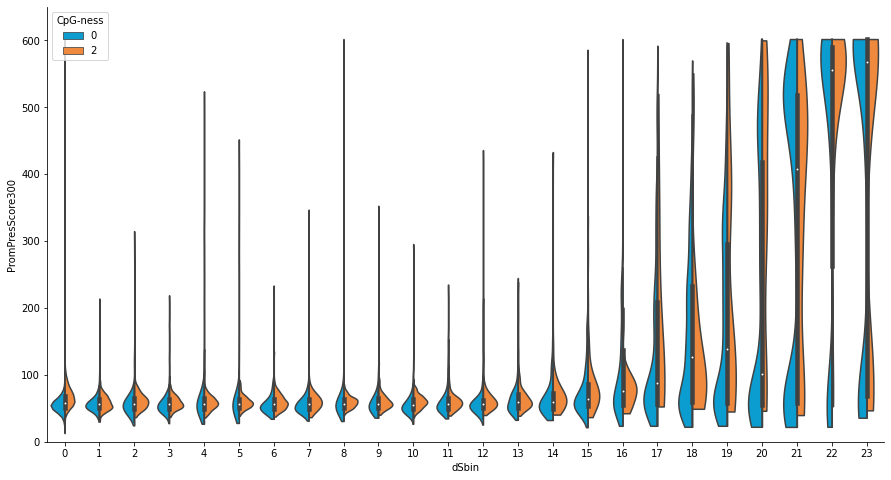

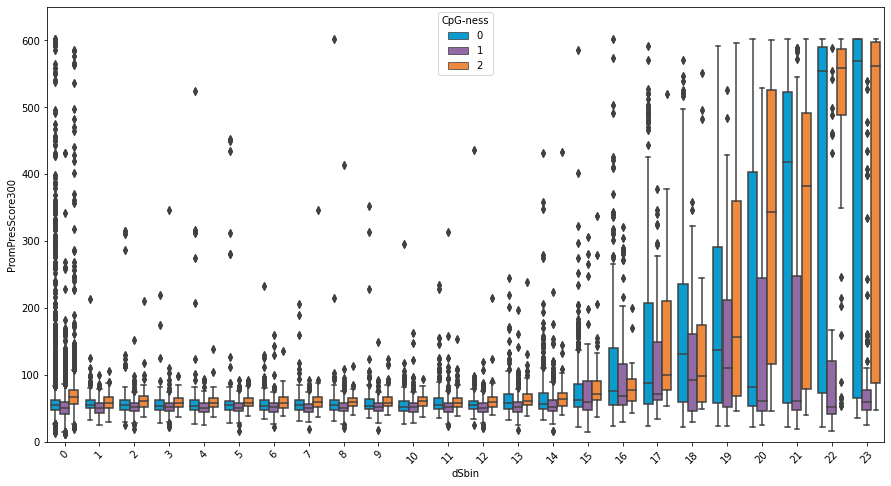

In [173]:
from matplotlib import pyplot
from seaborn import despine, violinplot, boxplot

branch_order = ["Opisthokonta", "Bilateria", "Chordata", "Vertebrata", "Gnathostomata", "Euteleostomi", "Sarcopterygii", "Tetrapoda", "Amniota",
                "Mammalia", "Theria", "Eutheria", "Boreoeutheria", "Euarchontoglires", "Primates", "Haplorrhini", "Simiiformes", "Catarrhini",
                "Hominoidea", "Hominidae", "Homininae", "Homo sapiens"]

fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
violinplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras["CpG-ness"] != 1], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
boxplot(ax=ax, x="Branch point", y="PromPresScore300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
ax.set_ylim(0, 650)
violinplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", cut=0, data=paras[paras["CpG-ness"] != 1], saturation=1.0, palette=['#0B9DCF', '#EF893D'], split=True)
despine()
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 650)
boxplot(ax=ax, x="dSbin", y="PromPresScore300", hue="CpG-ness", data=paras, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresTssMinus300'>

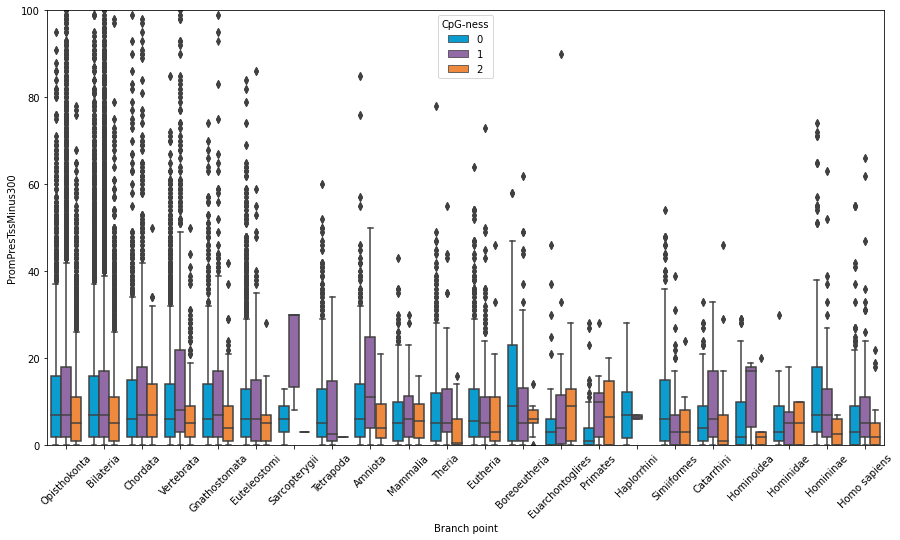

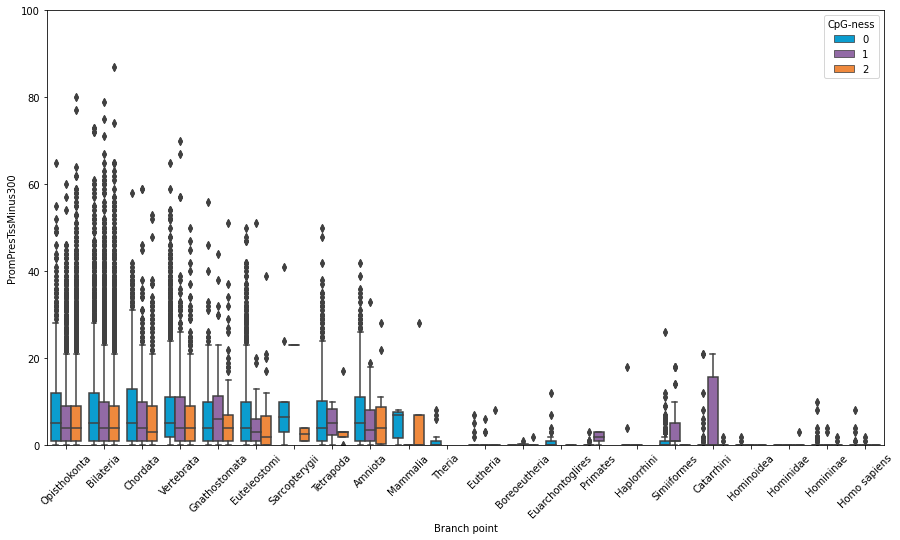

In [177]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 100)
boxplot(ax=ax, x="Branch point", y="PromPresTssMinus300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])


<AxesSubplot:xlabel='Branch point', ylabel='PromPresShift300'>

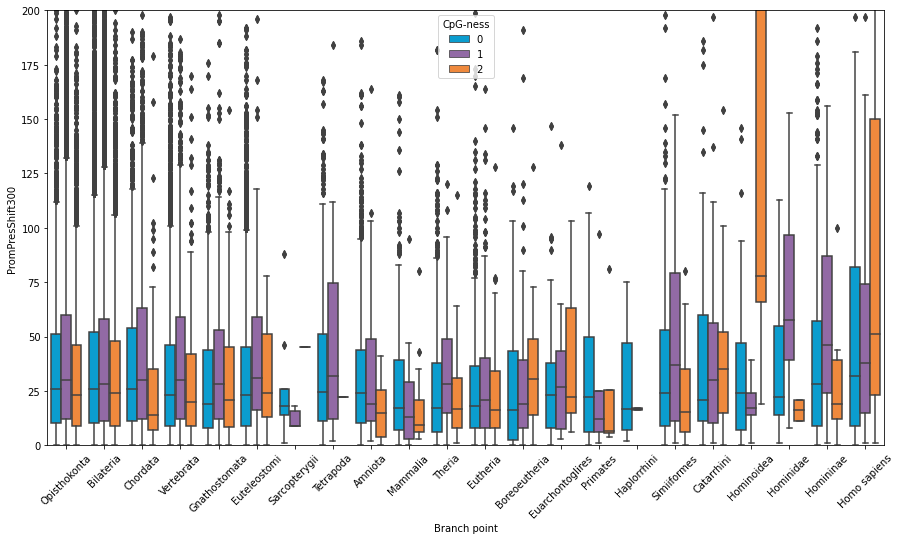

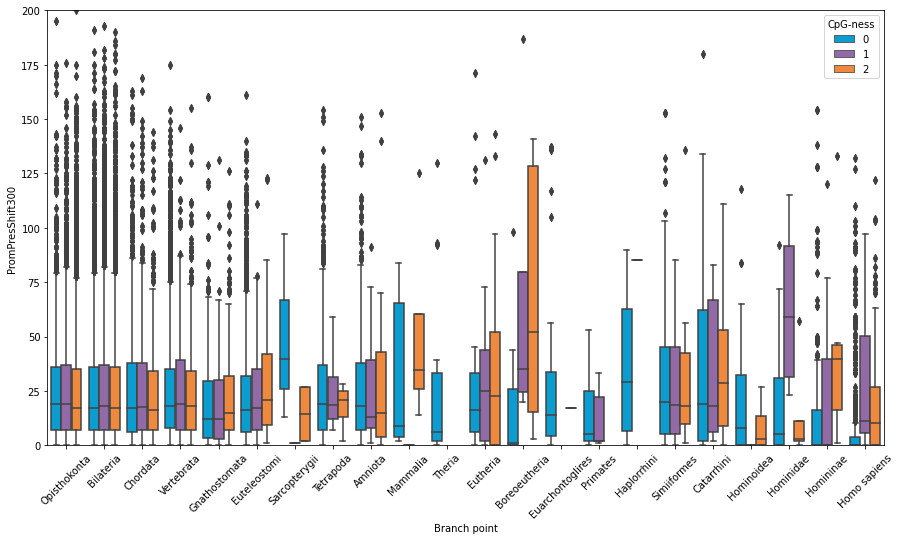

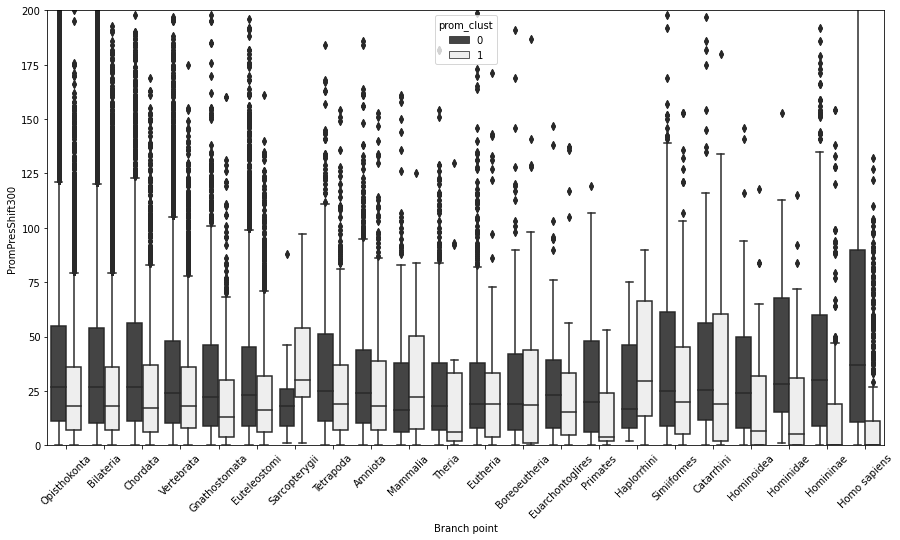

In [182]:
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 0)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="CpG-ness", data=paras[(paras["prom_clust"] == 1)], order=branch_order, saturation=1.0, palette=['#0B9DCF', '#926AA5', '#EF893D'])
fig, ax = pyplot.subplots(figsize=(15,8))
pyplot.xticks(rotation=45)
ax.set_ylim(0, 200)
boxplot(ax=ax, x="Branch point", y="PromPresShift300", hue="prom_clust", data=paras, order=branch_order, palette=['#444444', '#eeeeee'], saturation=1.0)
